In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
df15 = pd.read_csv("../Dataset/01-03-2018.csv", low_memory = False)

In [3]:
df15 = df15.drop([0,1])

In [4]:
df15

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
4,0,0,0,0,0,0,0,0,0,0,...,4,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,999909,0,999909,999909,61000000,0,61000000,61000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328179,0,0,0,0,0,0,0,1,0,0,...,0,20,0,0,0,0,0,0,0,0
328180,0,0,0,0,0,0,0,1,0,0,...,5,20,0,0,0,0,0,0,0,0
328181,0,0,0,0,0,0,1,1,0,0,...,7,20,0,0,0,0,0,0,0,0


In [5]:
df16Aux = pd.read_csv("../Dataset/28-02-2018.csv", low_memory = False)

In [6]:
df16Aux = df16Aux.drop([0,1])

In [7]:
df16Aux

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0,0,1,1,0,0,...,3,20,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,20,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,20,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,1,0,0,...,3,20,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,20,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606899,0,0,0,0,0,0,0,1,0,0,...,0,24,0,0,0,0,0,0,0,0
606900,0,0,0,0,0,0,0,1,0,0,...,0,24,0,0,0,0,0,0,0,0
606901,0,0,0,0,0,0,0,1,0,0,...,0,32,0,0,0,0,0,0,0,0
606902,0,0,0,0,0,0,0,1,0,0,...,0,24,0,0,0,0,0,0,0,0


In [8]:
listOrd = df15.columns.tolist()

In [9]:
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [10]:
df16

,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2,0,0,0,0,0,0,1,1,0,0,...,3,20,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,20,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,20,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,1,0,0,...,3,20,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,20,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606899,0,0,0,0,0,0,0,1,0,0,...,0,24,0,0,0,0,0,0,0,0
606900,0,0,0,0,0,0,0,1,0,0,...,0,24,0,0,0,0,0,0,0,0
606901,0,0,0,0,0,0,0,1,0,0,...,0,32,0,0,0,0,0,0,0,0
606902,0,0,0,0,0,0,0,1,0,0,...,0,24,0,0,0,0,0,0,0,0


In [11]:
df16Aux = None

In [12]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)

In [13]:
output_label15 = np.array(df15["Label"])

In [14]:
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15 = out

In [15]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)

In [16]:
output_label16 = np.array(df16["Label"])

In [17]:
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [18]:
dfAE = pd.concat([df15, df16])

In [19]:
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)

In [20]:
output_labelAE = np.array(dfAE["Label"])

In [21]:
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [22]:
dfAE = None
df15 = None
df16 = None

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

In [24]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)
input_label15, output_label15 = shuffle(input_label15, output_label15)
input_label16, output_label16 = shuffle(input_label16, output_label16)

## AutoEncoder

In [25]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [26]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [27]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [28]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [29]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
21040/21040 [==============================] - 25s 1ms/step - loss: 0.0025 - accuracy: 0.7266 - val_loss: 6.9881e-04 - val_accuracy: 0.7234
Epoch 2/10
21040/21040 [==============================] - 24s 1ms/step - loss: 6.9812e-04 - accuracy: 0.7559 - val_loss: 6.8601e-04 - val_accuracy: 0.7049
Epoch 3/10
21040/21040 [==============================] - 24s 1ms/step - loss: 6.7874e-04 - accuracy: 0.7483 - val_loss: 6.6911e-04 - val_accuracy: 0.6588
Epoch 4/10
21040/21040 [==============================] - 25s 1ms/step - loss: 6.7017e-04 - accuracy: 0.7551 - val_loss: 6.6106e-04 - val_accuracy: 0.6781
Epoch 5/10
21040/21040 [==============================] - 25s 1ms/step - loss: 6.6531e-04 - accuracy: 0.7581 - val_loss: 6.5515e-04 - val_accuracy: 0.8387
Epoch 6/10
21040/21040 [==============================] - 24s 1ms/step - loss: 6.6269e-04 - accuracy: 0.7593 - val_loss: 6.5459e-04 - val_accuracy: 0.6956
Epoch 7/10
21040/21040 [==============================] - 25s 1ms/step - l

In [30]:
predict = auto_encoder.predict(inp_test)

In [31]:
losses = keras.losses.mean_squared_error(out_test, predict).numpy()

In [32]:
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.0006374945026565087


In [33]:
input_labelAE = None
input_label15 = encoder.predict(input_label15).reshape(len(input_label15), 18, 1)
input_label16 = encoder.predict(input_label16).reshape(len(input_label16), 18, 1)

## Classificador

In [34]:
model = keras.Sequential([
        keras.layers.Conv1D(filters = 16, input_shape = (18,1), kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Conv1D(filters = 8, kernel_size = 3, padding = "same", activation = "relu", use_bias = True),
        keras.layers.MaxPool1D(pool_size = 3),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 2, activation = "softmax")
    ])

In [35]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [36]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, shuffle = True,verbose = 1)

Epoch 1/10
9231/9231 [==============================] - 13s 1ms/step - loss: 0.5876 - accuracy: 0.7077 - val_loss: 0.5587 - val_accuracy: 0.7519
Epoch 2/10
9231/9231 [==============================] - 12s 1ms/step - loss: 0.5595 - accuracy: 0.7529 - val_loss: 0.5523 - val_accuracy: 0.7569
Epoch 3/10
9231/9231 [==============================] - 13s 1ms/step - loss: 0.5509 - accuracy: 0.7556 - val_loss: 0.5461 - val_accuracy: 0.7574
Epoch 4/10
9231/9231 [==============================] - 13s 1ms/step - loss: 0.5450 - accuracy: 0.7593 - val_loss: 0.5420 - val_accuracy: 0.7558
Epoch 5/10
9231/9231 [==============================] - 13s 1ms/step - loss: 0.5417 - accuracy: 0.7620 - val_loss: 0.5387 - val_accuracy: 0.7634
Epoch 6/10
9231/9231 [==============================] - 13s 1ms/step - loss: 0.5390 - accuracy: 0.7622 - val_loss: 0.5376 - val_accuracy: 0.7664
Epoch 7/10
9231/9231 [==============================] - 13s 1ms/step - loss: 0.5380 - accuracy: 0.7623 - val_loss: 0.5356 - val_ac

In [37]:
res = [np.argmax(resu) for resu in model.predict(input_label16)]

In [38]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [39]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[503092  35574]
 [ 65267   2969]]


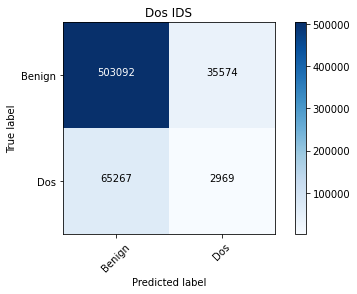

In [40]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [42]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

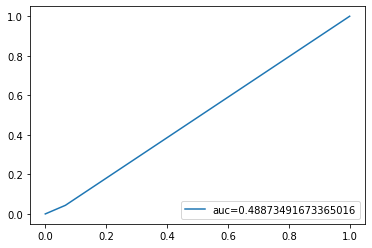

In [43]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()